## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:

"""Code Here
建立你的神經網路
    
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Tr

50000/50000 [==============================] - 29s 579us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 29s 577us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 29s 587us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 30s 591us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 30s 596us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 30s 596us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 30s 599us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/

Epoch 41/50
50000/50000 [==============================] - 30s 603us/step - loss: 1.1354 - acc: 0.6028 - val_loss: 1.3133 - val_acc: 0.5380
Epoch 42/50
50000/50000 [==============================] - 30s 605us/step - loss: 1.1200 - acc: 0.6058 - val_loss: 1.5390 - val_acc: 0.4799
Epoch 43/50
50000/50000 [==============================] - 30s 597us/step - loss: 1.1143 - acc: 0.6109 - val_loss: 1.3664 - val_acc: 0.5162
Epoch 44/50
50000/50000 [==============================] - 29s 590us/step - loss: 1.1024 - acc: 0.6143 - val_loss: 1.4615 - val_acc: 0.4941
Epoch 45/50
50000/50000 [==============================] - 30s 607us/step - loss: 1.0940 - acc: 0.6158 - val_loss: 1.5049 - val_acc: 0.4874
Epoch 46/50
50000/50000 [==============================] - 30s 609us/step - loss: 1.0938 - acc: 0.6178 - val_loss: 1.3835 - val_acc: 0.5165
Epoch 47/50
50000/50000 [==============================] - 30s 598us/step - loss: 1.0730 - acc: 0.6235 - val_loss: 1.6505 - val_acc: 0.4521
Epoch 48/50
50000/50

Epoch 42/50
50000/50000 [==============================] - 29s 571us/step - loss: 1.5803 - acc: 0.4496 - val_loss: 1.5957 - val_acc: 0.4381
Epoch 43/50
50000/50000 [==============================] - 29s 576us/step - loss: 1.5755 - acc: 0.4510 - val_loss: 1.6005 - val_acc: 0.4329
Epoch 44/50
50000/50000 [==============================] - 29s 574us/step - loss: 1.5707 - acc: 0.4516 - val_loss: 1.5896 - val_acc: 0.4440
Epoch 45/50
50000/50000 [==============================] - 29s 573us/step - loss: 1.5661 - acc: 0.4528 - val_loss: 1.5811 - val_acc: 0.4431
Epoch 46/50
50000/50000 [==============================] - 28s 569us/step - loss: 1.5617 - acc: 0.4558 - val_loss: 1.5805 - val_acc: 0.4459
Epoch 47/50
50000/50000 [==============================] - 29s 589us/step - loss: 1.5574 - acc: 0.4568 - val_loss: 1.5754 - val_acc: 0.4462
Epoch 48/50
50000/50000 [==============================] - 29s 573us/step - loss: 1.5526 - acc: 0.4582 - val_loss: 1.5827 - val_acc: 0.4436
Epoch 49/50
50000/50

Epoch 43/50
50000/50000 [==============================] - 31s 616us/step - loss: 1.9519 - acc: 0.3197 - val_loss: 1.9515 - val_acc: 0.3262
Epoch 44/50
50000/50000 [==============================] - 49s 979us/step - loss: 1.9474 - acc: 0.3204 - val_loss: 1.9473 - val_acc: 0.3279
Epoch 45/50
50000/50000 [==============================] - 49s 974us/step - loss: 1.9431 - acc: 0.3227 - val_loss: 1.9430 - val_acc: 0.3290
Epoch 46/50
50000/50000 [==============================] - 37s 739us/step - loss: 1.9390 - acc: 0.3245 - val_loss: 1.9390 - val_acc: 0.3282
Epoch 47/50
50000/50000 [==============================] - 43s 862us/step - loss: 1.9349 - acc: 0.3253 - val_loss: 1.9350 - val_acc: 0.3310
Epoch 48/50
50000/50000 [==============================] - 33s 653us/step - loss: 1.9309 - acc: 0.3265 - val_loss: 1.9313 - val_acc: 0.3314
Epoch 49/50
50000/50000 [==============================] - 55s 1ms/step - loss: 1.9272 - acc: 0.3275 - val_loss: 1.9275 - val_acc: 0.3324
Epoch 50/50
50000/5000

Epoch 44/50
50000/50000 [==============================] - 30s 593us/step - loss: 2.2448 - acc: 0.1666 - val_loss: 2.2439 - val_acc: 0.1665
Epoch 45/50
50000/50000 [==============================] - 30s 594us/step - loss: 2.2434 - acc: 0.1679 - val_loss: 2.2425 - val_acc: 0.1679
Epoch 46/50
50000/50000 [==============================] - 31s 613us/step - loss: 2.2421 - acc: 0.1692 - val_loss: 2.2412 - val_acc: 0.1692
Epoch 47/50
50000/50000 [==============================] - 31s 613us/step - loss: 2.2407 - acc: 0.1706 - val_loss: 2.2398 - val_acc: 0.1708
Epoch 48/50
50000/50000 [==============================] - 31s 624us/step - loss: 2.2394 - acc: 0.1717 - val_loss: 2.2385 - val_acc: 0.1722
Epoch 49/50
50000/50000 [==============================] - 30s 594us/step - loss: 2.2381 - acc: 0.1731 - val_loss: 2.2372 - val_acc: 0.1730
Epoch 50/50
50000/50000 [==============================] - 30s 604us/step - loss: 2.2368 - acc: 0.1740 - val_loss: 2.2359 - val_acc: 0.1743


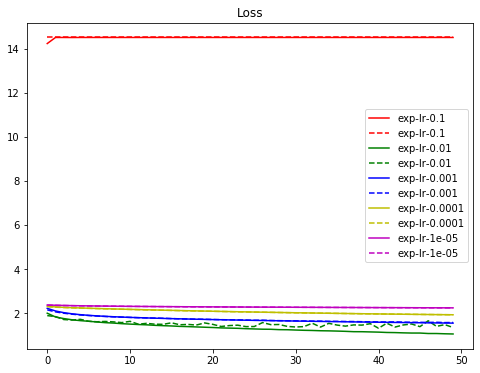

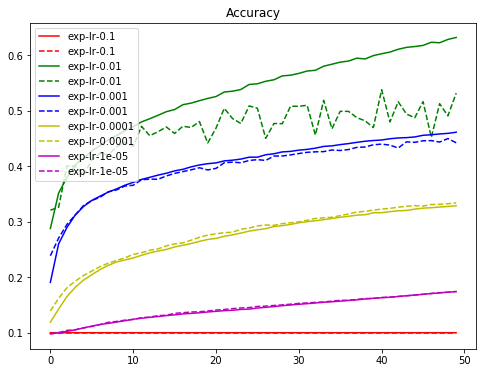

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

plt.show()